In [1]:
# Name, image go here

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',10000)

In [3]:
df = pd.read_excel('Unemployment2023.xlsx',skiprows=4)
df.info(max_cols=5000)
df.FIPS_Code = df.FIPS_Code.astype('str')
df.info(max_cols=5000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 104 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    FIPS_Code                                  3286 non-null   int64  
 1    State                                      3286 non-null   object 
 2    Area_Name                                  3286 non-null   object 
 3    Rural_Urban_Continuum_Code_2023            3221 non-null   float64
 4    Urban_Influence_Code_2013                  3219 non-null   float64
 5    Metro_2023                                 3221 non-null   float64
 6    Civilian_labor_force_2000                  3270 non-null   float64
 7    Employed_2000                              3270 non-null   float64
 8    Unemployed_2000                            3270 non-null   float64
 9    Unemployment_rate_2000                     3270 non-null   float64
 10   Civilian_l

In [4]:
columns_to_keep1 = ['FIPS_Code','State','Area_Name']
columns_to_keep2 = list(df.columns[df.columns.str.startswith(('Employed','Unemployed'))])
df = df[columns_to_keep1+columns_to_keep2]
df = df[~df.State.isin(['US','PR'])]
print(len(df.State.unique()),len(df))

51 3206


In [5]:
df_to_remove = df.FIPS_Code.str.endswith('000');
display(df[df_to_remove])
df = df[~df_to_remove]
print(len(df.State.unique()),len(df))

,FIPS_Code,State,Area_Name,Employed_2000,Unemployed_2000,Employed_2001,Unemployed_2001,Employed_2002,Unemployed_2002,Employed_2003,Unemployed_2003,Employed_2004,Unemployed_2004,Employed_2005,Unemployed_2005,Employed_2006,Unemployed_2006,Employed_2007,Unemployed_2007,Employed_2008,Unemployed_2008,Employed_2009,Unemployed_2009,Employed_2010,Unemployed_2010,Employed_2011,Unemployed_2011,Employed_2012,Unemployed_2012,Employed_2013,Unemployed_2013,Employed_2014,Unemployed_2014,Employed_2015,Unemployed_2015,Employed_2016,Unemployed_2016,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Employed_2022,Unemployed_2022,Employed_2023,Unemployed_2023
1,1000,AL,Alabama,2047731.0,99442.0,2017467.0,110560.0,1987633.0,124988.0,2001568.0,127100.0,2018783.0,119523.0,2045234.0,95122.0,2083207.0,86800.0,2092030.0,88418.0,2049579.0,127275.0,1938784.0,217809.0,1968824.0,228204.0,1991379.0,210958.0,2000848.0,177660.0,2012828.0,159274.0,2018705.0,146010.0,2020443.0,131852.0,2029157.0,126572.0,2103873.0,99585.0,2152270.0,87839.0,2199379.0,72456.0,2118600.0,144544.0,2173978.0,75536.0,2218627.0,57735.0,2250472.0,57659.0
69,2000,AK,Alaska,299590.0,20187.0,301422.0,20230.0,303560.0,23494.0,306964.0,25530.0,312394.0,25075.0,320273.0,23884.0,325672.0,23084.0,328309.0,21924.0,332364.0,22934.0,330718.0,28661.0,332185.0,29522.0,336312.0,28287.0,337834.0,26319.0,338104.0,25440.0,339704.0,24577.0,339604.0,22821.0,338193.0,23824.0,337108.0,23481.0,334068.0,21431.0,332197.0,19832.0,317678.0,28874.0,329147.0,22373.0,338729.0,14963.0,342005.0,15089.0
104,4000,AZ,Arizona,2410825.0,99786.0,2470816.0,122848.0,2518051.0,165451.0,2571097.0,157552.0,2649564.0,139054.0,2729018.0,133499.0,2843054.0,127625.0,2905144.0,113661.0,2916698.0,179295.0,2826426.0,302465.0,2777404.0,318912.0,2763761.0,288176.0,2799634.0,254709.0,2825341.0,239213.0,2906193.0,212248.0,2990545.0,193900.0,3075851.0,177617.0,3079700.0,160411.0,3166013.0,159708.0,3267548.0,164852.0,3200219.0,271120.0,3347264.0,178185.0,3462671.0,136860.0,3546508.0,144466.0
120,5000,AR,Arkansas,1207833.0,52674.0,1201314.0,60105.0,1209006.0,67958.0,1208583.0,73995.0,1229546.0,72832.0,1263663.0,70217.0,1276000.0,70532.0,1277902.0,72909.0,1284175.0,73541.0,1248691.0,104649.0,1247059.0,106576.0,1250431.0,107388.0,1251883.0,98005.0,1237609.0,94000.0,1249766.0,78193.0,1272785.0,66516.0,1290430.0,53461.0,1297854.0,50234.0,1294809.0,49053.0,1305858.0,47317.0,1257949.0,82608.0,1276933.0,53743.0,1315886.0,43654.0,1332876.0,44781.0
196,6000,CA,California,16011619.0,825917.0,16160509.0,935919.0,16081472.0,1165056.0,16081515.0,1190384.0,16293555.0,1080951.0,16593622.0,944309.0,16797845.0,863334.0,16955400.0,955326.0,16856082.0,1323825.0,16193122.0,2112831.0,16078454.0,2292082.0,16220602.0,2186154.0,16541039.0,1943842.0,16887864.0,1677544.0,17264518.0,1412174.0,17647409.0,1176732.0,17965407.0,1046610.0,18258064.0,927302.0,18469910.0,819595.0,18589551.0,795711.0,17037036.0,1921568.0,17568743.0,1387832.0,18348916.0,820425.0,18388329.0,919958.0
255,8000,CO,Colorado,2294104.0,64267.0,2304547.0,91465.0,2309639.0,139264.0,2338432.0,151965.0,2397588.0,141801.0,2442134.0,130248.0,2528550.0,111902.0,2588340.0,99402.0,2601712.0,132686.0,2515483.0,215121.0,2466996.0,248727.0,2493472.0,236790.0,2529785.0,219407.0,2579568.0,186572.0,2661070.0,139596.0,2719997.0,105764.0,2803504.0,90653.0,2885980.0,77810.0,2961423.0,92924.0,3022060.0,82624.0,2873752.0,208476.0,2977479.0,172194.0,3089081.0,97851.0,3128115.0,102367.0
320,9000,CT,Connecticut,1723597.0,37100.0,1698594.0,50601.0,1697788.0,78276.0,1688380.0,97357.0,1687121.0,90389.0,1707935.0,86366.0,1750385.0,80698.0,1773047.0,82961.0,1772393.0,105727.0,1731361.0,157013.0,1728121.0,183168.0,1741971.0,172478.0,1729687.0,157858.0,1718834.0,148544.0,1764118.0,124984.0,1785788.0,106299.0,1801390.0,91810.0,1838833.0,84878.0,1849370.0,74502.0,1862314.0,69512.0,1724812.0,149435.0,1724540.0,117626.0,1833670.0,78338.

51 3155


In [6]:
df = df.melt(id_vars=['FIPS_Code','State','Area_Name'])
df

,FIPS_Code,State,Area_Name,variable,value
0,1001,AL,"Autauga County, AL",Employed_2000,20971.0
1,1003,AL,"Baldwin County, AL",Employed_2000,67370.0
2,1005,AL,"Barbour County, AL",Employed_2000,10812.0
3,1007,AL,"Bibb County, AL",Employed_2000,8160.0
4,1009,AL,"Blount County, AL",Employed_2000,24375.0
...,...,...,...,...,...
151435,56037,WY,"Sweetwater County, WY",Unemployed_2023,676.0
151436,56039,WY,"Teton County, WY",Unemployed_2023,372.0
151437,56041,WY,"Uinta County, WY",Unemployed_2023,289.0
151438,56043,WY,"Washakie County, WY",Unemployed_2023,127.0


In [7]:
df[['Type','Year']] = df.variable.str.split('_',expand=True)
df = df.drop(columns=['variable'])
df.Year = df.Year.astype('int')

In [8]:
df = df.pivot(columns='Type',index=['FIPS_Code','State','Area_Name','Year'],values='value').reset_index()
df.columns.name=None
df

,FIPS_Code,State,Area_Name,Year,Employed,Unemployed
0,10001,DE,"Kent County, DE",2000,60946.0,2442.0
1,10001,DE,"Kent County, DE",2001,62457.0,2434.0
2,10001,DE,"Kent County, DE",2002,62977.0,2753.0
3,10001,DE,"Kent County, DE",2003,64087.0,2996.0
4,10001,DE,"Kent County, DE",2004,66524.0,2614.0
...,...,...,...,...,...,...
75715,9190,CT,"Western Connecticut Planning Region, CT",2019,NaN,NaN
75716,9190,CT,"Western Connecticut Planning Region, CT",2020,NaN,NaN
75717,9190,CT,"Western Connecticut Planning Region, CT",2021,NaN,NaN
75718,9190,CT,"Western Connecticut Planning Region, CT",2022,NaN,NaN


In [9]:
df.Area_Name = df.Area_Name.apply(lambda x: ','.join(x.split(',')[:-1]))

In [10]:
df = df.sort_values(['State','Area_Name','Year'],ascending=True).reset_index(drop=True)

In [11]:
df

,FIPS_Code,State,Area_Name,Year,Employed,Unemployed
0,2013,AK,Aleutians East Borough,2000,860.0,82.0
1,2013,AK,Aleutians East Borough,2001,928.0,83.0
2,2013,AK,Aleutians East Borough,2002,886.0,84.0
3,2013,AK,Aleutians East Borough,2003,915.0,97.0
4,2013,AK,Aleutians East Borough,2004,1019.0,96.0
...,...,...,...,...,...,...
75715,56045,WY,Weston County,2019,3675.0,114.0
75716,56045,WY,Weston County,2020,3640.0,146.0
75717,56045,WY,Weston County,2021,3594.0,120.0
75718,56045,WY,Weston County,2022,3725.0,98.0


In [12]:
df.dropna(inplace=True)
df.info()
df.to_excel('Unemployment_transformed.xlsx',index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 75354 entries, 0 to 75719
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FIPS_Code   75354 non-null  object 
 1   State       75354 non-null  object 
 2   Area_Name   75354 non-null  object 
 3   Year        75354 non-null  int64  
 4   Employed    75354 non-null  float64
 5   Unemployed  75354 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.0+ MB


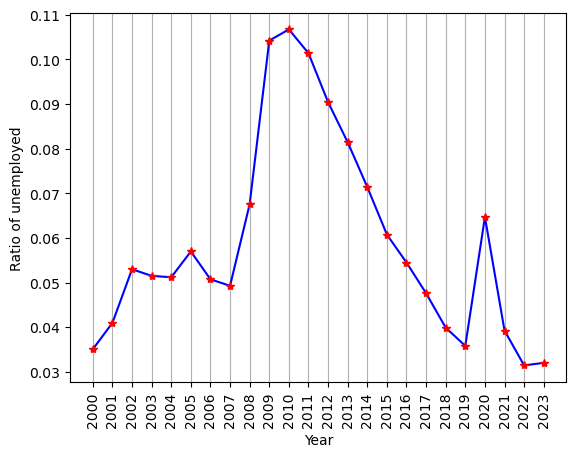

In [13]:
import matplotlib.pyplot as plt
df_ga = df[df.State=='GA'].copy()[['Year','Unemployed','Employed']].groupby('Year').sum().reset_index()
df_ga['Unemployment_Rate'] = df_ga.Unemployed / (df_ga.Unemployed+df_ga.Employed)
plt.plot(df_ga.Year,df_ga.Unemployment_Rate,'b-',df_ga.Year,df_ga.Unemployment_Rate,'r*')
plt.ylabel('Ratio of unemployed')
plt.xlabel('Year')
plt.xticks(range(2000,2024),rotation=90)
plt.grid(axis='x')
plt.show()

In [14]:
# highest range
df_states_year = df.groupby(['State','Year'])[['Unemployed','Employed']].sum()
df_states_year['Unemployment_Rate'] = df_states_year.Unemployed/(df_states_year.Employed+df_states_year.Unemployed)
df_states_year = df_states_year.groupby(level="State")
df_states_delta = df_states_year[['Unemployment_Rate']].agg(['idxmax','idxmin','max','min'])
df_states_delta.columns=['Max_Year','Min_Year','Max_Rate','Min_Rate']
df_states_delta['Max_Year'] = df_states_delta['Max_Year'].apply(lambda x: x[1])
df_states_delta['Min_Year'] = df_states_delta['Min_Year'].apply(lambda x: x[1])
df_states_delta['Range'] = df_states_delta['Max_Rate'] - df_states_delta['Min_Rate']
df_states_delta.sort_values(by='Range', ascending=False).head(10)

,Max_Year,Min_Year,Max_Rate,Min_Rate,Range
State,,,,,
NV,2010,2006,0.137603,0.040457,0.097145
MI,2009,2000,0.131394,0.036423,0.094971
HI,2020,2017,0.116829,0.022203,0.094626
SC,2009,2019,0.114195,0.027704,0.086491
RI,2010,2023,0.116445,0.030041,0.086404
FL,2010,2006,0.108418,0.024637,0.083781
CA,2010,2019,0.124770,0.041047,0.083722
AL,2010,2023,0.103872,0.024982,0.078889
NC,2009,2023,0.110363,0.034554,0.075809


Text(0.5, 1.0, 'Workforce growth in Georgia (red) vs other states')

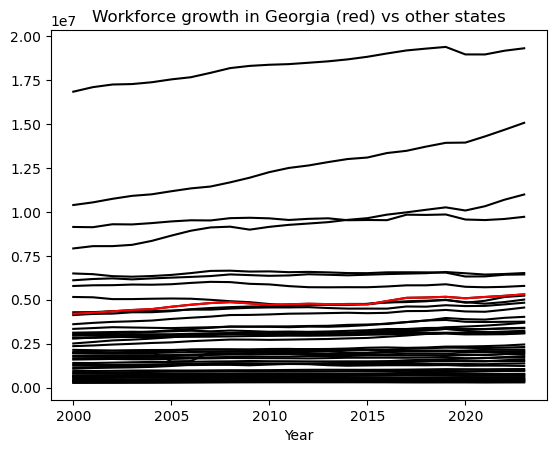

In [15]:
df['Workforce'] = df.Employed+df.Unemployed
df_workforce = df.groupby(['State','Year'])[['Workforce']].sum()
df_workforce_state = df_workforce.reset_index('State').pivot(columns='State')
df_workforce_state.columns = df_workforce_state.columns.map(lambda x: x[1])
ax = df_workforce_state.plot(legend=None,color='black')
ax = df_workforce_state.filter(like='GA').plot(ax=ax,legend=None,color='red')
ax.set_title('Workforce growth in Georgia (red) vs other states')